# Project 2 - Ames Housing Sale Price Prediction

---



## Problem Statement

Ames is a city in Iowa, United States.The dataset provides information about the various factors that influence the sale price of house in ames city. Most of the variables are exactly the type of information that a typical home buyer would want to know about a potential property. This project will study the various features which affects the sale price of the house and create a regression model based on the Ames Housing Dataset, which can be used to predict the sale price of a house based on those influential features.  

## Executive Summary



### Contents
- [Train Data Import & Cleaning](#Train-Data-Import-and-Cleaning)
>1.Reading train Data<br>
>2.Display data<br>
>3.Data types<br>
>4.Data description<br>
>5.Null values<br>
>6.Overview of dataset<br>
>7.Dropping Unnecessary Rows<br>
>8.Filling Missing values<br>
>9.Complete Dataset<br>
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
>1.Summary Statistics<br>
>2.Exploratory Visualizations<br>
- [Pre-processing](#Pre-processing)
>1.Categorical columns<br>
>2.Ordinal Columns<br>
>3.Nominal Columns<br>
>4.Numerical Columns<br>
>5.Label Encoding<br>
>6.One Hot Encoding<br>
- [Modeling](#Modeling)
>1.Creating features matrix (`X`) and target vector (`y`)<br>
>2.Train/test split<br>
>3.Scaling<br>
>4.Instantiating Models<br>
>5.Model Fitting and Evaluation<br>
>6.Final Model<br>
- [Inferential Visualizations](#Inferential-Visualizations)<br><br>
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)<br><br>
- [Kaggle Submission](#Kaggle-Submission)
>1.Reading test Data<br>
>2.Display Data<br>
>3.Data types<br>
>4.Number of null Values<br>
>5.Filling Null values<br>
>6.Summary Statistics<br>
>7.Label Encoding<br>
>8.One Hot Encoding<br>
>9.X_test<br>
>10.Predictions<br>
>11.Creating .csv file<br>


*All libraries used are  added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV,ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings(action="ignore")

%matplotlib inline

## Train Data Import and Cleaning

### 1. Reading train Data

In [2]:
#Code:
# reading the csv file into pandas dataframes
train=pd.read_csv('../datasets/train.csv')

### 2. Display Data

In [3]:
#Code:
#displaying the first 5 rows of dataframe
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### 3. Data types 

In [4]:
#code
#datatype of each variable in dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

### 4.Data Description

The data has 81 columns which include 22 nominal, 21 ordinal, 38 numeric variables 


| Feature | Description |
| --- | ---|
ID (Discrete)| Identification number
PID (Nominal)| Parcel identification number  - can be used with city web site for parcel review. 
MS SubClass (Nominal)| Identifies the type of dwelling involved in the sale.       
MS Zoning (Nominal)| Identifies the general zoning classification of the sale.	
Lot Frontage (Continuous)| Linear feet of street connected to property
Lot Area (Continuous)| Lot size in square feet
Street (Nominal)| Type of road access to property      	
Alley (Nominal)| Type of alley access to property		
Lot Shape (Ordinal)| General shape of property      
Land Contour (Nominal)| Flatness of the property		
Utilities (Ordinal)| Type of utilities available	
Lot Config (Nominal)| Lot configuration	
Land Slope (Ordinal)| Slope of property     
Neighborhood (Nominal)| Physical locations within Ames city limits (map available)			
Condition 1 (Nominal)| Proximity to various conditions	
Condition 2 (Nominal)| Proximity to various conditions (if more than one is present)      
Bldg Type (Nominal)| Type of dwelling	
House Style (Nominal)| Style of dwelling	
Overall Qual (Ordinal)| Rates the overall material and finish of the house	
Overall Cond (Ordinal)| Rates the overall condition of the house		
Year Built (Discrete)| Original construction date
Year Remod/Add (Discrete)| Remodel date (same as construction date if no remodeling or additions)
Roof Style (Nominal)| Type of roof		
Roof Matl (Nominal)| Roof material		
Exterior 1 (Nominal)| Exterior covering on house	
Exterior 2 (Nominal)| Exterior covering on house (if more than one material)	
Mas Vnr Type (Nominal)| Masonry veneer type     
Mas Vnr Area (Continuous)| Masonry veneer area in square feet
Exter Qual (Ordinal)| Evaluates the quality of the material on the exterior 		
Exter Cond (Ordinal)| Evaluates the present condition of the material on the exterior		
Foundation (Nominal)| Type of foundation		
Bsmt Qual (Ordinal)| Evaluates the height of the basement		
Bsmt Cond (Ordinal)| Evaluates the general condition of the basement
Bsmt Exposure	(Ordinal)| Refers to walkout or garden level walls      
BsmtFin Type 1	(Ordinal)| Rating of basement finished area		
BsmtFin SF 1 (Continuous)| Type 1 finished square feet
BsmtFinType 2	(Ordinal)| Rating of basement finished area (if multiple types)
BsmtFin SF 2 (Continuous)| Type 2 finished square feet
Bsmt Unf SF (Continuous)| Unfinished square feet of basement area
Total Bsmt SF (Continuous)| Total square feet of basement area
Heating	(Nominal)| Type of heating		
HeatingQC (Ordinal)| Heating quality and condition
Central Air (Nominal)| Central air conditioning		
Electrical (Ordinal)| Electrical system		
1st Flr SF (Continuous)| First Floor square feet 
2nd Flr SF (Continuous)	| Second floor square feet
Low Qual Fin SF (Continuous)| Low quality finished square feet (all floors)
Gr Liv Area (Continuous)| Above grade (ground) living area square feet
Bsmt Full Bath (Discrete)| Basement full bathrooms
Bsmt Half Bath (Discrete)| Basement half bathrooms
Full Bath (Discrete)| Full bathrooms above grade
Half Bath (Discrete)| Half baths above grade
Bedroom (Discrete)| Bedrooms above grade (does NOT include basement bedrooms)
Kitchen (Discrete)| Kitchens above grade
KitchenQual (Ordinal)| Kitchen quality      	
TotRmsAbvGrd	(Discrete)| Total rooms above grade (does not include bathrooms)
Functional (Ordinal)| Home functionality (Assume typical unless deductions are warranted)		
Fireplaces (Discrete)| Number of fireplaces
FireplaceQu (Ordinal)| Fireplace quality		
Garage Type (Nominal)| Garage location     
Garage Yr Blt (Discrete)| Year garage was built		
Garage Finish (Ordinal)	| Interior finish of the garage		
Garage Cars (Discrete)| Size of garage in car capacity
Garage Area (Continuous)| Size of garage in square feet
Garage Qual (Ordinal)| Garage quality		
Garage Cond (Ordinal)| Garage condition		
Paved Drive (Ordinal)| Paved driveway		
Wood Deck SF (Continuous)| Wood deck area in square feet
Open Porch SF (Continuous)| Open porch area in square feet
Enclosed Porch (Continuous)| Enclosed porch area in square feet
3-Ssn Porch (Continuous)| Three season porch area in square feet
Screen Porch (Continuous)| Screen porch area in square feet
Pool Area (Continuous)| Pool area in square feet
Pool QC (Ordinal)|Pool quality		
Fence (Ordinal)| Fence quality	
Misc Feature (Nominal)| Miscellaneous feature not covered in other categories		
Misc Val (Continuous)| Value of miscellaneous feature
Mo Sold (Discrete)| Month Sold (MM)
Yr Sold (Discrete)| Year Sold (YYYY)
Sale Type (Nominal)| Type of sale		
Sale Condition (Nominal)| Condition of sale
SalePrice (Continuous)| Sale price $

### 5. Null values

In [5]:
#checking the number of null values in each column
pd.options.display.max_rows=None
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

### 7. Drop Unnecessary rows

In [6]:
# dropping this row as the 'Garage Yr Blt'is 2207, which is an invalid year
pd.options.display.max_columns=None
train[train['Garage Yr Blt']==2207]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300


In [7]:
train.drop([1699],inplace=True)

### 8. Filling Missing Values

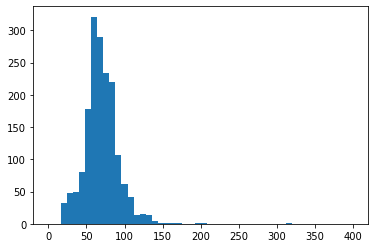

In [8]:
# Lot Frontage is a numerical column with values ranging from 21 to 313
#checking the distribution of Lot Frontage Values
plt.hist(train['Lot Frontage'],bins=50,range=[0,400]);

In [9]:
# Lot Frontage values are normally distributed, 
#hence null values are filled with mean value (as there are not much outliers)
train['Lot Frontage'].fillna(train['Lot Frontage'].mean(),inplace=True)
                             

In [10]:
#Based on data description, The following columns with NAN values are replaced with 'NA' values 
# which is meaningful value.
train['Alley'].fillna('NA',inplace=True) #NA - no alley access
train['Fireplace Qu'].fillna('NA',inplace=True) #NA - no fireplace
train['Pool QC'].fillna('NA',inplace=True) #NA - no pool
train['Fence'].fillna('NA',inplace=True) #NA - no fence
train['Misc Feature'].fillna('NA',inplace=True) #NA - None

#### Masonry veneer 

In [11]:
#columns based on Masonry veneer 
#Mas Vnr Type and Mas Vnr Area - missing  22 values
train[train['Mas Vnr Type'].isnull()].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.0,12867,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NA,NA,NA,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NA,NA,NA,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NA,NA,NA,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NA,NA,NA,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,32,0,0,0,0,0,NA,NA,NA,0,4,2006,WD,117250


In [12]:
# null values of Mas Vnr Type is filled with None,which means no Vaneer type  
# null values of Mas Vnr Area is filled with zero as corresponding mas vaner type is none
train['Mas Vnr Type'].fillna('None',inplace=True)
train['Mas Vnr Area'].fillna(0,inplace=True)

#### Basement

In [13]:
# columns based on basement with null values
#Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
train[train['Bsmt Exposure'].isnull()].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
12,807,906226060,70,RL,120.000000,26400,Pave,NA,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NA,NA,NA,0,6,2009,WD,131000
93,811,906226100,90,RL,64.000000,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1535,0,0,1535,0.0,0.0,2,0,4,2,TA,8,Typ,0,NA,Attchd,1979.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NA,GdPrv,NA,0,6,2009,WD,118858
114,781,905228050,20,RL,69.055814,9000,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NA,NA,NA,0,6,2009,WD,63900
146,888,908128060,85,RL,64.000000,7301,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NA,NA,NA,0,7,2009,ConLD,198500
183,1554,910251050,20,A (agr),80.000000,14584,Pave,NA,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Sal,0,NA,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NA,NA,NA,0,2,2008,WD,13100


In [14]:
# the following rows have values for all basement realted columns except Bsmt Exposure 

train.loc[(train['Id']==2780) | (train['Id']==1797) |( train['Id']==67)]


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1456,1797,528458090,60,FV,81.0,10411,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NA,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NA,NA,NA,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NA,NA,NA,0,2,2006,WD,192500


In [15]:
# mode of Bsmt Exposure
train['Bsmt Exposure'].value_counts()

No    1339
Av     287
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

In [16]:
# filling the values with 'No'- no exposure in basement (mode of Bsmt Exposure )
train['Bsmt Exposure'][1456]='No'
train['Bsmt Exposure'][1547]='No'
train['Bsmt Exposure'][1997]='No'

In [17]:
# filling all the other basement related columns with 'NA'-no basement
train['Bsmt Qual'].fillna('NA',inplace=True)
train['Bsmt Cond'].fillna('NA',inplace=True)
train['Bsmt Exposure'].fillna('NA',inplace=True)
train['BsmtFin Type 1'].fillna('NA',inplace=True)
train['BsmtFin Type 2'].fillna('NA',inplace=True)

In [18]:
#filling all the numerical columns related to basemnt with 0 as it has no basement 
train['BsmtFin SF 1'].fillna(0,inplace=True)
train['BsmtFin SF 2'].fillna(0,inplace=True)
train['Bsmt Unf SF'].fillna(0,inplace=True)
train['Total Bsmt SF'].fillna(0,inplace=True)
train['Bsmt Half Bath'].fillna(0,inplace=True)
train['Bsmt Full Bath'].fillna(0,inplace=True)

#### Garage 

In [19]:
# columns based on Garage with null values - Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
train[train['Garage Finish'].isnull()].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,2243,911103060,190,C (all),75.0,8250,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,NA,NA,NA,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,NA,NA,NA,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,NA,NA,NA,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,NA,NA,NA,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,NA,NA,NA,0,7,2007,WD,86000


In [20]:
#This row has value in column- Garage Type but the corresponding Garage related columns are all null
# filling up 'NA'values in corresponding column will make this row meaningless as it has value for garage type
# hence, this value is changed to 'NA'- meaning no garage 

train['Garage Type'][1712]='NA'
train.loc[train['Id']==2237]['Garage Type']

1712    NA
Name: Garage Type, dtype: object

In [21]:
# replacing all the other garage related columns with 'NA'- no garage
train['Garage Type'].fillna('NA',inplace=True)
train['Garage Finish'].fillna('NA',inplace=True)
train['Garage Qual'].fillna('NA',inplace=True)
train['Garage Cond'].fillna('NA',inplace=True)


In [22]:
# replacing all the numerical values realted to garage with 0, as it has no garage 
train['Garage Yr Blt'].fillna(0,inplace=True)
train['Garage Cars'].fillna(0,inplace=True)
train['Garage Area'].fillna(0,inplace=True)

### 9.Complete  Dataset

In [23]:
# dataset has no null values
train.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

 # Exploratory Data Analysis

### 1.Summary Statistics

In [24]:
#Quick overview of dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2050.0,1.473650e+03,8.440076e+02,1.0,7.532500e+02,1.483500e+03,2.196500e+03,2930.0
PID,2050.0,7.134911e+08,1.886847e+08,526301100.0,5.284581e+08,5.354532e+08,9.071790e+08,924152030.0
MS SubClass,2050.0,5.702683e+01,4.282686e+01,20.0,2.000000e+01,5.000000e+01,7.000000e+01,190.0
Lot Frontage,2050.0,6.905581e+01,2.131154e+01,21.0,6.000000e+01,6.905581e+01,7.800000e+01,313.0
Lot Area,2050.0,1.006607e+04,6.744021e+03,1300.0,7.500000e+03,9.432000e+03,1.151425e+04,159000.0
Overall Qual,2050.0,6.111220e+00,1.426008e+00,1.0,5.000000e+00,6.000000e+00,7.000000e+00,10.0
Overall Cond,2050.0,5.562439e+00,1.104697e+00,1.0,5.000000e+00,5.000000e+00,6.000000e+00,9.0
Year Built,2050.0,1.971692e+03,3.017574e+01,1872.0,1.953250e+03,1.974000e+03,2.001000e+03,2010.0
Year Remod/Add,2050.0,1.984179e+03,2.103535e+01,1950.0,1.964250e+03,1.993000e+03,2.004000e+03,2010.0
Mas Vnr Area,2050.0,9.867463e+01,1.743536e+02,0.0,0.000000e+00,0.000000e+00,1.595000e+02,1600.0


In [25]:
# correlation of all the numerical variables against Saleprice
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800078
Gr Liv Area        0.697173
Garage Area        0.650016
Garage Cars        0.647825
Total Bsmt SF      0.629090
1st Flr SF         0.618284
Year Built         0.571592
Year Remod/Add     0.550112
Full Bath          0.537794
TotRms AbvGrd      0.504316
Mas Vnr Area       0.504061
Fireplaces         0.470936
BsmtFin SF 1       0.423825
Open Porch SF      0.333990
Wood Deck SF       0.326433
Lot Frontage       0.325970
Lot Area           0.296794
Bsmt Full Bath     0.283892
Half Bath          0.283511
Garage Yr Blt      0.258360
2nd Flr SF         0.248968
Bsmt Unf SF        0.190483
Bedroom AbvGr      0.137681
Screen Porch       0.134775
3Ssn Porch         0.048800
Mo Sold            0.032217
Pool Area          0.023147
BsmtFin SF 2       0.016590
Misc Val          -0.007329
Yr Sold           -0.014896
Low Qual Fin SF   -0.041549
Bsmt Half Bath    -0.045171
Id                -0.051917
MS SubClass       -0.086919
Overall Cond      -0

### 2.Exploratory Visualizations

Text(0, 0.5, 'Frequency')

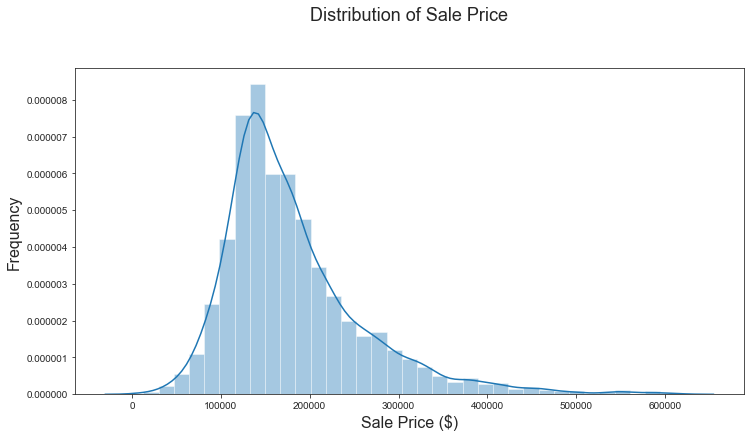

In [26]:
sns.set_style('ticks')
plt.figure(figsize=(12,6))
sns.distplot(train['SalePrice'],bins=35)
plt.title('Distribution of Sale Price\n\n ', fontsize=18)
plt.xlabel('Sale Price ($)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Sale Price is almost normally distributed with few houses above 400000

Text(0, 0.5, 'Above grade (ground) living area (square feet)')

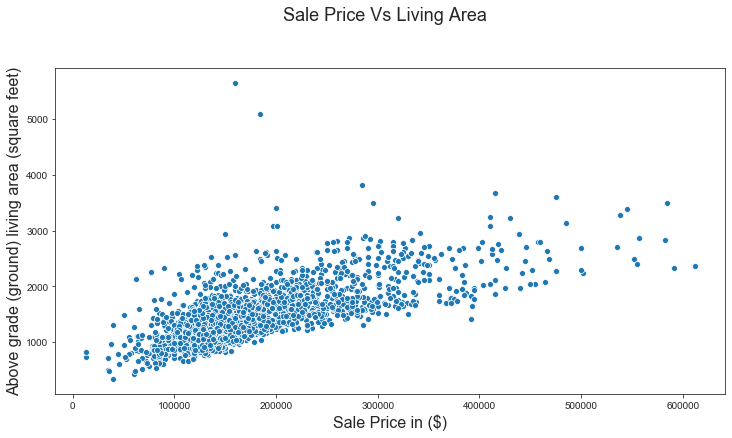

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train['SalePrice'],y=train['Gr Liv Area'])
plt.title('Sale Price Vs Living Area  \n\n ', fontsize=18)
plt.xlabel('Sale Price in ($)', fontsize=16)
plt.ylabel('Above grade (ground) living area (square feet)', fontsize=16)

This shows a postive corelation between Sale Price and Living area 

Text(0, 0.5, 'Sale Price in ($)')

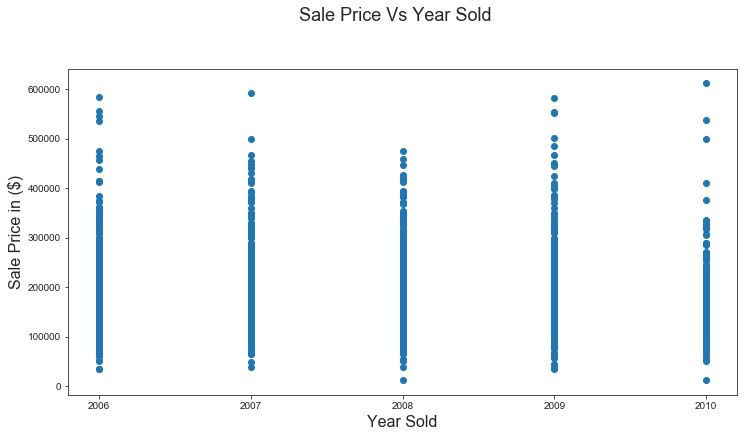

In [28]:


ax=plt.figure(figsize=(12,6))

plt.scatter(x=train['Yr Sold'],y=train['SalePrice'])
plt.xticks([2006,2007,2008,2009,2010])
plt.title('Sale Price Vs Year Sold   \n\n ', fontsize=18)
plt.xlabel('Year Sold', fontsize=16)
plt.ylabel('Sale Price in ($)', fontsize=16)


This shows that Sale price was almost consistant throughout the years shown above

<Figure size 1296x720 with 0 Axes>

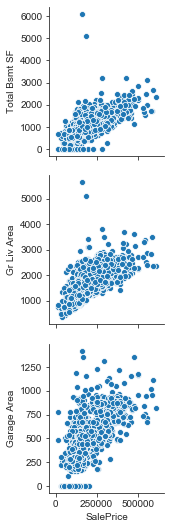

In [29]:
plt.figure(figsize=(18,10))
sns.pairplot(train, y_vars=['Total Bsmt SF','Gr Liv Area','Garage Area'], x_vars=['SalePrice'])


Comparision of Sale Price with Garage Area, Living Area and Basement Area

# Pre-processing
  Columns are seperated into categorical and numerical values.
  Categroical variables are further divided into Ordinal and Nominal and finally processed.

### 1. Categorical Columns

In [30]:
#storing all the categorical variables in as a list in categorical_columns
categorical_columns=[col for col in train.columns if train[col].dtype == 'O']
categorical_columns[:5]

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour']

### 2.Ordinal Columns

In [31]:
# list of ordinal columns in dataframe

categorical_ordinal=['Lot Shape','Utilities','Land Slope','Exter Qual','Exter Cond',
 'Bsmt Qual','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC',
 'Electrical','Bsmt Cond','Kitchen Qual','Functional','Fireplace Qu','Garage Finish',
 'Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence']

In [32]:
# total number of ordinal variables 
len(categorical_ordinal)

21

### 3. Nominal Columns

In [33]:
# list of nominal columns in dataframe
categorical_nominal=['MS Zoning','MS SubClass',
 'Street','Alley','Land Contour','Lot Config',
 'Neighborhood','Condition 1','Condition 2',
 'Bldg Type','House Style','Roof Style',
 'Roof Matl','Exterior 1st','Exterior 2nd',
 'Mas Vnr Type','Foundation','Central Air',
 'Heating','Garage Type','Misc Feature',
 'Sale Type']

In [34]:
# total number of nominal variables 
len(categorical_nominal)

22

### 4. Numerical Columns

In [35]:
#storing all the numerical variables as list in numerical_columns
numerical_columns=[col for col in train.columns if train[col].dtype != 'O']


In [36]:
# MS SubClass is removed from numerical_columns as it is a nominal categorical variable
numerical_columns.remove('MS SubClass')

In [37]:
len(numerical_columns)

38

### 5. Label Encoding

In [38]:
# converting ordinal columns into numeric columns by giving them values corresponding to their category

#importing library for label encoding
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
# encoding every ordinal category into numeric 
for item in categorical_ordinal:
    final=item+'_code'
    train[final] = lb.fit_transform(train[item])
    

In [39]:
# dataset after Label Encoding with numerical values for ordinal columns
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Lot Shape_code,Utilities_code,Land Slope_code,Exter Qual_code,Exter Cond_code,Bsmt Qual_code,Bsmt Exposure_code,BsmtFin Type 1_code,BsmtFin Type 2_code,Heating QC_code,Electrical_code,Bsmt Cond_code,Kitchen Qual_code,Functional_code,Fireplace Qu_code,Garage Finish_code,Garage Qual_code,Garage Cond_code,Paved Drive_code,Pool QC_code,Fence_code
0,109,533352170,60,RL,69.055814,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500,0,0,0,2,4,5,4,2,6,0,4,5,2,7,3,2,5,5,2,3,4
1,544,531379050,60,RL,43.000000,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000,0,0,0,2,4,2,4,2,6,0,4,5,2,7,5,2,5,5,2,3,4
2,153,535304180,20,RL,68.000000,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000,3,0,0,3,2,5,4,2,6,4,4,5,2,7,3,3,5,5,2,3,4
3,318,916386060,60,RL,73.000000,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000,3,0,0,3,4,2,4,6,6,2,4,5,3,7,3,0,5,5,2,3,4
4,255,906425045,50,RL,82.000000,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500,0,0,0,3,4,1,4,6,6,4,4,2,3,7,3,3,5,5,0,3,4


### 6. One Hot Encoding

In [40]:
# One Hot encoding -to convert the nominal values into zeros and ones
train = pd.get_dummies(train,columns=categorical_nominal,drop_first=True) 

In [41]:
#dataset with numerical values for nominal variables
train.head()

,Id,PID,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice,Lot Shape_code,Utilities_code,Land Slope_code,Exter Qual_code,Exter Cond_code,Bsmt Qual_code,Bsmt Exposure_code,BsmtFin Type 1_code,BsmtFin Type 2_code,Heating QC_code,Electrical_code,Bsmt Cond_code,Kitchen Qual_code,Functional_code,Fireplace Qu_code,Garage Finish_code,Garage Qual_code,Garage Cond_code,Paved Drive_code,Pool QC_code,Fence_code,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Street_Pave,Alley_NA,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_Y,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Misc Feature_Gar2,Misc Feature_NA,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,69.055814,13517,IR1,AllPub,Gtl,6,8,1976,2005,289.0,Gd,TA,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,Ex,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,

In [42]:
# checking the number of columns after one hot encoding
train.shape

(2050, 234)

In [43]:
#the number of numeric columns
len([col for col in train._get_numeric_data().columns if col!='SalePrice'])


212

In [44]:
#dropping the PID , Id column 
#represents Identification Number and Parcel identification number respectively
# which will not be helpful in determining Sale Price
train.drop(['PID','Id'],axis=1,inplace=True)

 # Modeling 

### 1.Creating features matrix (`X`) and target vector (`y`)

In [45]:
#selecting x and y for the model

features=[col for col in train._get_numeric_data().columns if col!='SalePrice']
X = train[features]
y = train['SalePrice']

### 2.Train/test split

In [46]:
# Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 3.Scaling

In [47]:
#fitting a `StandardScaler` to `X_train` and use it to transform both `X_train` and `X_test`

ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

### 4.Instantiating Models

## Linear Regression 

In [48]:
# Instantiate Linear Regression model
lr = LinearRegression()

In [49]:
# calculating r2 value with 10 fold cross validation
lr_scores = cross_val_score(lr, X_train_sc, y_train,cv=10,scoring='r2')
lr_scores.mean()

-1.4948214940428864e+22

## Lasso Regression

In [50]:
# Instantiate Lasso Regression model
lasso = LassoCV(alphas=np.arange(0.01, 0.5, 0.02))

In [51]:
# calculating r2 value with 10 fold cross validation
lasso_scores = cross_val_score(lasso, X_train_sc, y_train,cv=10,scoring='r2')
lasso_scores.mean()

0.7274298636614627

## Ridge Regression

In [52]:
# Instantiate Ridge Regression model
ridge = RidgeCV(alphas=np.logspace(0, 5, 200))

In [53]:
# calculating r2 value with 10 fold cross validation
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=10,scoring='r2')
ridge_scores.mean()

0.8452580273926534

## Elastic Net Regression

In [54]:
# Instantiate ElasticNet Regression model
enet= ElasticNetCV(alphas=np.arange(0.5, 1.0, 0.005))

In [55]:
# calculating r2 value with 10 fold cross validation
enet_scores = cross_val_score(enet, X_train_sc, y_train, cv=10,scoring='r2')
enet_scores.mean()

0.8458197756841173

 
| Regression Type | R2 Values |
| --- | ---|
Linear Regression| -1.56852
Lasso Regression| 0.79699423
Ridge Regression| 0.839138
Elastic Net Regression| 0.84045

#### Based on r2 value,Elastic Net is choosen for model fitting and Evaluation

### 5. Model Fitting and Evaluation

In [56]:
#Fitting the model to the training data, and evaluating the training and test scores below.
enet.fit(X_train_sc, y_train)

ElasticNetCV(alphas=array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
       0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
       0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
       0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
       0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
       0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
       0.77 , 0.775, 0.78 , 0.785, 0.79 , 0....
       0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895, 0.9  ,
       0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 , 0.945,
       0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985, 0.99 ,
       0.995]),
             copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [57]:
#training data r2 score
enet.score(X_train_sc, y_train)

0.889918338079279

In [58]:
#test data r2 score
enet.score(X_test_sc, y_test)

0.8790119767860196

In [59]:
# predicting y values based on X_test
predictions = enet.predict(X_test_sc)

In [60]:
#calculating r2 values for y test data and predictions
r2_score(y_test, predictions)

0.8790119767860196

In [61]:
#coeffients of Elastic Net
coef = pd.Series(enet.coef_, index = X_train.columns)

In [62]:
#Coefficients in Ascending Order
coef.sort_values()

Exter Qual_code        -5746.503470
Kitchen Qual_code      -5266.632794
Misc Val               -5191.148052
Bsmt Exposure_code     -3387.813381
Bsmt Qual_code         -3314.173513
Neighborhood_Edwards   -2624.452754
Bldg Type_TwnhsE       -2120.033559
Neighborhood_Gilbert   -2055.126953
MS SubClass_120        -2030.100381
BsmtFin Type 1_code    -1874.818311
MS SubClass_160        -1642.891821
Neighborhood_CollgCr   -1588.282699
Bldg Type_Twnhs        -1565.186061
Garage Finish_code     -1510.829955
Neighborhood_NAmes     -1433.822967
Kitchen AbvGr          -1431.374417
Neighborhood_MeadowV   -1408.151936
Roof Style_Gable       -1353.412419
Heating QC_code        -1220.165000
Pool Area              -1219.176785
Roof Style_Mansard     -1209.935522
Neighborhood_OldTown   -1183.403882
Exterior 2nd_Stucco    -1091.226486
MS Zoning_RM           -1077.726329
Exterior 1st_HdBoard   -1075.917851
MS SubClass_150        -1007.338815
Exterior 1st_Stucco     -957.451374
Condition 1_RRAe        -942

In [63]:
# features Selected based on coefficient values for Sale Price prediction

features_selected=[  
'Overall Qual',
'Overall Cond', 
'Mas Vnr Area',
'Total Bsmt SF' ,
'Gr Liv Area', 
'TotRms AbvGrd',                       
'Fireplaces', 
'Garage Area' ,
'Pool Area'  , 
'Exter Qual_code',            
'Bsmt Exposure_code', 
'Kitchen Qual_code',
'MS SubClass_120', 
'Neighborhood_StoneBr',                 
'Bldg Type_TwnhsE',      
'Roof Matl_WdShngl' ,               
]

In [64]:
#number of features selected for Sale Price prediction
len(features_selected)

16

### 6. Final Model 

In [65]:
#selecting x and y for the model
features=features_selected
X = train[features]
y = train['SalePrice']

# Import train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
# Columns selected 
X_test.columns

Index(['Overall Qual', 'Overall Cond', 'Mas Vnr Area', 'Total Bsmt SF',
       'Gr Liv Area', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area',
       'Pool Area', 'Exter Qual_code', 'Bsmt Exposure_code',
       'Kitchen Qual_code', 'MS SubClass_120', 'Neighborhood_StoneBr',
       'Bldg Type_TwnhsE', 'Roof Matl_WdShngl'],
      dtype='object')

In [67]:
#fitting a `StandardScaler` to `X_train` and use it to transform both `X_train` and `X_test`
ss_Model2 = StandardScaler()
ss_Model2.fit(X_train)
X_train_sc = ss_Model2.transform(X_train)
X_test_sc = ss_Model2.transform(X_test)

# Elastic Net

In [68]:
# Instantiate ElasticNet Regression model
enet= ElasticNetCV(alphas=np.arange(0.5, 1.0, 0.005))

In [69]:
# calculating r2 value with 10 fold cross validation
enet_scores = cross_val_score(enet, X_train_sc, y_train, cv=10)
enet_scores.mean()

0.8315542133059821

In [70]:
#Fitting the model to the training data, and evaluating the training and test scores below.
enet.fit(X_train_sc, y_train)

ElasticNetCV(alphas=array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
       0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
       0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
       0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
       0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
       0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
       0.77 , 0.775, 0.78 , 0.785, 0.79 , 0....
       0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895, 0.9  ,
       0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 , 0.945,
       0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985, 0.99 ,
       0.995]),
             copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [71]:
#training data r2 score
enet.score(X_train_sc, y_train)

0.8422850566305715

In [72]:
#test data r2 score
enet.score(X_test_sc, y_test)

0.7718681082175987

In [73]:
# predicting y values based on X_test
predictions = enet.predict(X_test_sc)

In [74]:
#calculating r2 values for y test data and predictions
r2_score(y_test, predictions)

0.7718681082175988

In [75]:
#Calulating Residuals
residuals = y_test - predictions

In [76]:
#coeffients of Elastic Net
coef = pd.Series(enet.coef_, index = X_train.columns)

In [77]:
#Coefficients in Ascending Order
coef.sort_values()

Exter Qual_code        -10857.169583
Kitchen Qual_code       -9860.434658
Bsmt Exposure_code      -5541.111312
Bldg Type_TwnhsE        -1827.423449
MS SubClass_120         -1083.310435
Pool Area                -135.053119
Roof Matl_WdShngl        1714.789555
Overall Cond             2787.426926
TotRms AbvGrd            3308.539699
Mas Vnr Area             6013.029057
Neighborhood_StoneBr     6360.467782
Fireplaces               7527.496958
Total Bsmt SF           11312.979830
Garage Area             11437.497840
Gr Liv Area             14609.905803
Overall Qual            17506.030012
dtype: float64

# Inferential Visualizations

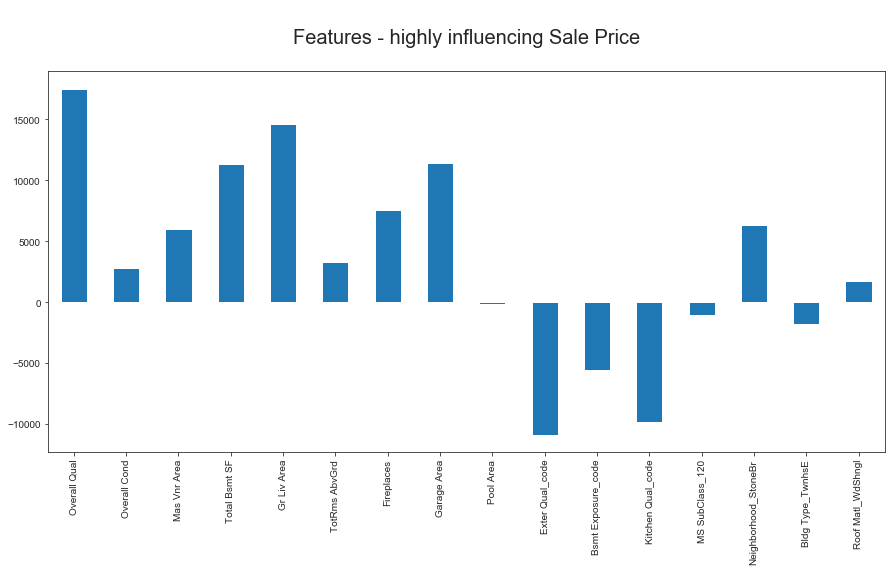

In [78]:
#Coefficients of features
plt.title(' \nFeatures - highly influencing Sale Price\n',fontsize=20);
pd.Series(enet.coef_, index=features).plot.bar(figsize=(15, 7));

The topmost features that influenze the Sale Price of the House in Ames City



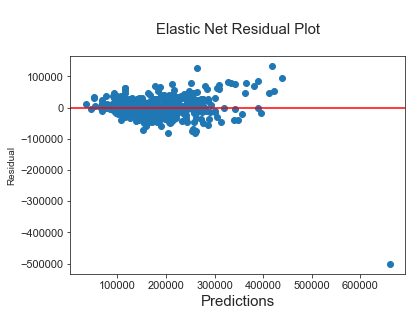

In [79]:
#residual plot analysis
plt.scatter(predictions, residuals);
plt.axhline(0, color='r');
plt.title("\nElastic Net Residual Plot\n",fontsize=15);
plt.xticks(fontsize=11);
plt.yticks(fontsize=11);
plt.xlabel('Predictions',fontsize=15);
plt.ylabel('Residual',fontsize=10);

This residual plot shows the residuals on the vertical(X) axis and the independent variable on the horizontal(Y) axis.This plot shows a random pattern, indicating a good fit .

# Conclusions and Recommendations

The top feature that highly influence the sale price at a coefficient of 16790.143356 is **Overall Quality** which  represents the overall material and finish of the house.The other top features include size of **Living Area**, followed by  **Garage** and **Basement area**.This is obvious as the potential buyer will look forward for all these qualities in his/her dream home.**Fireplace** is also one of the most influencing feature, as the temperature in winter drops to average 12 degree Farenhiet.

Another top feature that highly influences the price is properties located at Stone Brooks neighbourhood.It is clearly evident as Stone Brooke is a residential community in Ames, Iowa.Conveniently located on the north side of the city, it is within a few minutes drive or public transport ride to the Iowa State University campus and the Ames Shopping Mall.

However it is interesting to note that Exterior qulaity and kitchen quality is negatively related to Sale price.

All these features will enable property developers to better target buyers, or educate home owners on the Sale price of the houses.

This project is developed based on Ames housing dataset,It can be generalized to other cities by removing certain columns like neighbourhood which is specific to Ames city and also by gaining additional data like population, educational institutions near the property and pollution index etc.

# Kaggle Submission

### 1. Reading test Data

In [80]:
#Code:
# reading the csv file into pandas dataframes
test=pd.read_csv('../datasets/test.csv')

### 2. Display Data

In [81]:
#Code:
#displaying the first 5 rows of dataframe
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


### 3. Data types 

In [82]:
#code
#datatype of each variable in dataframe
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

### 4. Number of  null values:

In [83]:
#checking the number of null values in each column
test.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              821
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

### 5. Filling Null Values

In [84]:
#Based on data description, The following columns with NAN values are replaced with 'NA' values 
# which is meaningful value. Eg Alley with 'NA' value mean that it has no alley access.
test['Alley'].fillna('NA',inplace=True)
test['Fireplace Qu'].fillna('NA',inplace=True)
test['Pool QC'].fillna('NA',inplace=True)
test['Fence'].fillna('NA',inplace=True)
test['Misc Feature'].fillna('NA',inplace=True)
test['Mas Vnr Type'].fillna('None',inplace=True)
test['Mas Vnr Area'].fillna(0,inplace=True)
test['Garage Type'].fillna('NA',inplace=True)
test['Garage Finish'].fillna('NA',inplace=True)
test['Garage Qual'].fillna('NA',inplace=True)
test['Garage Cond'].fillna('NA',inplace=True)
test['Garage Yr Blt'].fillna(0,inplace=True)
# filling all the other basement related columns with 'NA'-no basement
test['Bsmt Qual'].fillna('NA',inplace=True)
test['Bsmt Cond'].fillna('NA',inplace=True)
test['Bsmt Exposure'].fillna('NA',inplace=True)
test['BsmtFin Type 1'].fillna('NA',inplace=True)
test['BsmtFin Type 2'].fillna('NA',inplace=True)

In [85]:
# Lot Frontage values are filled with mean value of train dataset
test['Lot Frontage'].fillna(train['Lot Frontage'].mean(),inplace=True)

In [86]:
# null value in Electrical column
test[test['Electrical'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
635,1578,916386080,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NA,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,5,2008,WD


In [87]:
# mode of Electrical column
test['Electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [88]:
# filling the null value with mode of the column
test['Electrical'][635]='SBrkr'

### 6. Summary Statistics

In [89]:
#Quick overview of dataset
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,879.0,1.445588e+03,8.507171e+02,2.0,692.5,1.435000e+03,2197.0,2.928000e+03
PID,879.0,7.165050e+08,1.889135e+08,526302110.0,528486085.0,5.354542e+08,907192140.0,1.007100e+09
MS SubClass,879.0,5.827076e+01,4.221139e+01,20.0,20.0,5.000000e+01,70.0,1.900000e+02
Lot Frontage,879.0,6.952552e+01,2.136569e+01,21.0,60.0,6.905581e+01,78.5,1.820000e+02
Lot Area,879.0,1.034092e+04,1.004734e+04,1477.0,7298.5,9.453000e+03,11606.5,2.152450e+05
Overall Qual,879.0,6.054608e+00,1.374756e+00,2.0,5.0,6.000000e+00,7.0,1.000000e+01
Overall Cond,879.0,5.565415e+00,1.128422e+00,1.0,5.0,5.000000e+00,6.0,9.000000e+00
Year Built,879.0,1.970534e+03,3.040353e+01,1880.0,1954.0,1.972000e+03,2000.0,2.010000e+03
Year Remod/Add,879.0,1.984445e+03,2.045455e+01,1950.0,1967.0,1.992000e+03,2003.0,2.010000e+03
Mas Vnr Area,879.0,1.068612e+02,1.882841e+02,0.0,0.0,0.000000e+00,173.0,1.378000e+03


### 7.Label Encoding

In [90]:
# converting ordinal columns into numeric columns by giving them values

#importing library for label encoding
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
# encoding every ordinal category into numeric 
for item in categorical_ordinal:
    final=item+'_code'
    test[final] = lb.fit_transform(test[item])
    

In [91]:
#dataset after Label encoding
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Lot Shape_code,Utilities_code,Land Slope_code,Exter Qual_code,Exter Cond_code,Bsmt Qual_code,Bsmt Exposure_code,BsmtFin Type 1_code,BsmtFin Type 2_code,Heating QC_code,Electrical_code,Bsmt Cond_code,Kitchen Qual_code,Functional_code,Fireplace Qu_code,Garage Finish_code,Garage Qual_code,Garage Cond_code,Paved Drive_code,Pool QC_code,Fence_code
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD,3,0,0,3,1,1,4,6,6,2,2,3,1,5,3,3,3,4,2,1,4
1,2718,905108090,90,RL,69.055814,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD,0,0,0,3,4,2,4,6,6,3,3,3,4,5,3,0,4,5,2,1,4
2,2414,528218130,60,RL,58.000000,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New,0,0,0,2,4,2,0,2,6,0,3,1,2,5,2,2,4,5,2,1,4
3,1989,902207150,30,RM,60.000000,8520,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD,3,0,0,2,4,5,4,6,6,3,3,3,4,5,3,3,0,5,0,1,4
4,625,535105100,20,RL,69.055814,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD,0,0,0,3,4,2,4,1,6,2,3,3,4,5,2,2,4,5,2,1,4


### 8. One Hot Encoding

In [92]:
# One Hot encoding -to convert the categorical values into zeros and ones
test = pd.get_dummies(test,columns=categorical_nominal,drop_first=True) 

In [93]:
#dataset with all numerical values
test.head()

,Id,PID,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,Lot Shape_code,Utilities_code,Land Slope_code,Exter Qual_code,Exter Cond_code,Bsmt Qual_code,Bsmt Exposure_code,BsmtFin Type 1_code,BsmtFin Type 2_code,Heating QC_code,Electrical_code,Bsmt Cond_code,Kitchen Qual_code,Functional_code,Fireplace Qu_code,Garage Finish_code,Garage Qual_code,Garage Cond_code,Paved Drive_code,Pool QC_code,Fence_code,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,Street_Pave,Alley_NA,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_Y,Heating_GasA,Heating_GasW,Heating_Grav,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Misc Feature_NA,Misc Feature_Othr,Misc Feature_Shed,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,69.000000,9142,Reg,AllPub,Gtl,6,8,1910,1950,0.0,TA,Fa,Fa,TA,No,Unf,0,Unf,0,1020,1020,Gd,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,0,4,2006,3,0,0,3,1,1,4,6,6,2,2,3,1,5,3,3,3,4,2,1,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1

In [94]:
#final shape of test dataset
test.shape

(879, 223)

In [95]:
#list of columns to be dropped to retain columns that is not is selected features
columns_drop=[col for col in test.columns if col not in features_selected]

In [96]:
#Number of columns to be dropped
len(columns_drop)

207

In [97]:
# stroring the columns with selected features into a new dataset
kaggle_dataset=test.drop(columns_drop,axis=1)

In [98]:
#head of kaggle_dataset
kaggle_dataset.head()

,Overall Qual,Overall Cond,Mas Vnr Area,Total Bsmt SF,Gr Liv Area,TotRms AbvGrd,Fireplaces,Garage Area,Pool Area,Exter Qual_code,Bsmt Exposure_code,Kitchen Qual_code,MS SubClass_120,Neighborhood_StoneBr,Bldg Type_TwnhsE,Roof Matl_WdShngl
0,6,8,0.0,1020,1928,9,0,440,0,3,4,1,0,0,0,0
1,5,4,0.0,1967,1967,10,0,580,0,3,4,4,0,0,0,0
2,7,5,0.0,654,1496,7,1,426,0,2,0,2,0,0,0,0
3,5,6,0.0,968,968,5,0,480,0,2,4,4,0,0,0,0
4,6,5,247.0,1394,1394,6,2,514,0,3,4,4,0,0,0,0


In [99]:
# shape of kaggle_dataset
kaggle_dataset.shape

(879, 16)

### 9. X_test 

In [100]:
# Assigning kaggle_dataset to variable X_test_kaggle
X_test_kaggle=kaggle_dataset

In [101]:
# Scaling the variable X_test_kaggle 
X_test_sc_kaggle = ss_Model2.transform(X_test_kaggle)

### 10.Predictions

In [102]:
# Predicting sale price
predictions_kaggle = enet.predict(X_test_sc_kaggle)


In [103]:
# Predictions values
predictions_kaggle[:2]

array([195634.89012264, 173177.76273394])

### 11.Creating  .csv file

In [104]:
# Creating an empty data frame
submission_kaggle = pd.DataFrame()


In [105]:
# Assigning values to the data frame-submission_kaggle
submission_kaggle['Id'] = test.Id
submission_kaggle['SalePrice'] = predictions_kaggle

In [106]:
# Head of submission_kaggle
submission_kaggle.head()

,Id,SalePrice
0,2658,195634.890123
1,2718,173177.762734
2,2414,203076.505003
3,1989,122544.182050
4,625,176794.947779


In [107]:
# saving data as  final_kaggle.csv
submission_kaggle.loc[ :].to_csv('../datasets/final_kaggle.csv',index=False)